In [1]:
import pandas as pd
import numpy as np
import io


In [36]:
import os
import pandas as pd

# dictionary as before
municipality_map = {
    "Alytaus r.": "Alytaus r. sav.",
    "Alytus": "Alytaus m. sav.",
    "Druskininkai": "Druskininkų sav.",
    "Lazdijų r.": "Lazdijų r. sav.",
    "Varėnos r.": "Varėnos r. sav.",
    "Alytaus apskritis": "Alytaus apskritis",
    "Birštonas": "Birštono sav.",
    "Jonavos r.": "Jonavos r. sav.",
    "Kaišiadorių r.": "Kaišiadorių r. sav.",
    "Kaunas": "Kauno m. sav.",
    "Kauno r.": "Kauno r. sav.",
    "Kėdainių r.": "Kėdainių r. sav.",
    "Prienų r.": "Prienų r. sav.",
    "Raseinių r.": "Raseinių r. sav.",
    "Kauno apskritis": "Kauno apskritis",
    "Klaipėda": "Klaipėdos m. sav.",
    "Klaipėdos r.": "Klaipėdos r. sav.",
    "Kretingos r.": "Kretingos r. sav.",
    "Neringa": "Neringos sav.",
    "Palanga": "Palangos m. sav.",
    "Šilutės r.": "Šilutės r. sav.",
    "Skuodo r.": "Skuodo r. sav.",
    "Klaipėdos apskritis": "Klaipėdos apskritis",
    "Marijampolės r.": "Marijampolės r. sav.",
    "Šakių r.": "Šakių r. sav.",
    "Vilkaviškio r.": "Vilkaviškio r. sav.",
    "Marijampolės apskritis": "Marijampolės apskritis",
    "Biržų r.": "Biržų r. sav.",
    "Kupiškio r.": "Kupiškio r. sav.",
    "Panevėžio r.": "Panevėžio r. sav.",
    "Panevėžys": "Panevėžio m. sav.",
    "Pasvalio r.": "Pasvalio r. sav.",
    "Rokiškio r.": "Rokiškio r. sav.",
    "Panevėžio apskritis": "Panevėžio apskritis",
    "Akmenės r.": "Akmenės r. sav.",
    "Joniškio r.": "Joniškio r. sav.",
    "Kelmės r.": "Kelmės r. sav.",
    "Radviliškio r.": "Radviliškio r. sav.",
    "Šiauliai": "Šiaulių m. sav.",
    "Šiaulių r.": "Šiaulių r. sav.",
    "Šiaulių apskritis": "Šiaulių apskritis",
    "Jurbarko r.": "Jurbarko r. sav.",
    "Šilalės r.": "Šilalės r. sav.",
    "Tauragės r.": "Tauragės r. sav.",
    "Tauragės apskritis": "Tauragės apskritis",
    "Mažeikių r.": "Mažeikių r. sav.",
    "Plungės r.": "Plungės r. sav.",
    "Telšių r.": "Telšių r. sav.",
    "Telšių apskritis": "Telšių apskritis",
    "Anykščių r.": "Anykščių r. sav.",
    "Ignalinos r.": "Ignalinos r. sav.",
    "Molėtų r.": "Molėtų r. sav.",
    "Utenos r.": "Utenos r. sav.",
    "Visaginas": "Visagino sav.",
    "Zarasų r.": "Zarasų r. sav.",
    "Utenos apskritis": "Utenos apskritis",
    "Šalčininkų r.": "Šalčininkų r. sav.",
    "Širvintų r.": "Širvintų r. sav.",
    "Švenčionių r.": "Švenčionių r. sav.",
    "Trakų r.": "Trakų r. sav.",
    "Ukmergės r.": "Ukmergės r. sav.",
    "Vilniaus r.": "Vilniaus r. sav.",
    "Vilnius": "Vilniaus m. sav.",
    "Vilnius ir raj" : "Vilnius ir raj",
    "Vilniaus apskritis": "Vilniaus apskritis",
    "Lazdyjų r." : "Lazdyjų r.",
}

def remap_csv_files(input_dir=r"E:\pyth\parsed_csv", output_dir="parsed_csv_cleaned"):
    """Reads all CSV files in input_dir, maps municipality names in column 0,
    and saves cleaned versions into output_dir. Prints line counts."""
    os.makedirs(output_dir, exist_ok=True)
    
    for filename in sorted(os.listdir(input_dir)):
        if filename.endswith(".csv"):
            filepath = os.path.join(input_dir, filename)
            df = pd.read_csv(filepath, header=None)  # no headers assumed
            original_count = len(df)
               # map names in first column
            df = df.drop(0)
            mapped = df[0].map(municipality_map)

            # find unmapped rows
            unmapped = df[0][mapped.isna()]
            if not unmapped.empty:
                print(f"⚠️ Unmapped in {filename}:")
                for val in unmapped.unique():
                    print(f"   - {val}")

            # replace column with mapped values
            df[0] = mapped

            # drop rows that didn’t map
            df = df.dropna(subset=[0])
            cleaned_count = len(df)
            # save cleaned file
            outpath = os.path.join(output_dir, filename)
            df.to_csv(outpath, index=False, header="name,year,month,infection".split(","))
            good = "❌"
            if cleaned_count+1 == original_count:
                good = "✅" 
            print(f"Processed {filename}: original={original_count}, cleaned={cleaned_count+1} {good} {cleaned_count+1-original_count} → {outpath}")

# Example run:
# remap_csv_files()
remap_csv_files()

Processed 2004.csv: original=601, cleaned=601 ✅ 0 → parsed_csv_cleaned\2004.csv
Processed 2005.csv: original=698, cleaned=698 ✅ 0 → parsed_csv_cleaned\2005.csv
Processed 2006.csv: original=745, cleaned=745 ✅ 0 → parsed_csv_cleaned\2006.csv
Processed 2007.csv: original=745, cleaned=745 ✅ 0 → parsed_csv_cleaned\2007.csv
Processed 2008.csv: original=745, cleaned=745 ✅ 0 → parsed_csv_cleaned\2008.csv
Processed 2009.csv: original=745, cleaned=745 ✅ 0 → parsed_csv_cleaned\2009.csv
Processed 2010.csv: original=745, cleaned=745 ✅ 0 → parsed_csv_cleaned\2010.csv
Processed 2011.csv: original=769, cleaned=769 ✅ 0 → parsed_csv_cleaned\2011.csv
Processed 2012.csv: original=769, cleaned=769 ✅ 0 → parsed_csv_cleaned\2012.csv
Processed 2013.csv: original=769, cleaned=769 ✅ 0 → parsed_csv_cleaned\2013.csv
Processed 2014.csv: original=769, cleaned=769 ✅ 0 → parsed_csv_cleaned\2014.csv
Processed 2015.csv: original=769, cleaned=769 ✅ 0 → parsed_csv_cleaned\2015.csv
Processed 2017.csv: original=769, cleane

In [32]:
df = pd.read_csv(r"E:\pyth\parsed_csv\2007.csv")
arr = np.array(df.loc[:,df.columns[0]].drop_duplicates())
df = pd.read_csv(r"E:\pyth\parsed_csv\2017.csv")
arr2 = np.array(df.loc[:,df.columns[0]].drop_duplicates())

for e in arr:
    if e not in arr2:
        print(e)

fixes = [
    ["Alytaus m.", "Alytus"],
    ["Druskininkų m.", "Druskininkai"],
    ["Kauno m.", "Kaunas"],
    ["Klaipėdos m.", "Klaipėda"],
    ["Palangos m.", "Palanga"],
    ["Šakių m.", "Šakių r."],
    ["Marijampolės m. ir raj.", "Marijampolės r."],
    ["Panevėžio m.", "Panevėžys"],
    ["Šiaulių m.", "Šiauliai"],
    ["Pakruojo r.", "Pakruojis"],
    ["Visagino m.", "Visaginas"],
    ["Vilniaus m.", "Vilnius"],
    ["aps.", "apskritis"]
]
def clean_csv(input_path, output_path=None):
    """Remove unwanted rows from a CSV where name starts with banned prefixes."""
    banned_prefixes = ["VRM įstaigos", "KAM padaliniai", "Iš viso Lietuvoje", "Pakruojis", "Vilnius ir raj"]

    df = pd.read_csv(input_path)

    # Keep only rows that do NOT start with banned prefixes
    mask = ~df["name"].astype(str).str.startswith(tuple(banned_prefixes))
    df_clean = df[mask]

    if output_path is None:
        output_path = input_path  # overwrite original if no output path

    df_clean.to_csv(output_path, index=False, encoding="utf-8")
    print(f"✅ Cleaned {input_path} → {output_path} ({len(df_clean)} rows left)")
    return df_clean

for year in range(2004, 2011):
    print(year)
    clean_csv(input_path = f"E:\pyth\parsed_csv\{year}.csv")
    # with io.open(f"E:\pyth\parsed_csv\{year}.csv", "r+", encoding="utf-8") as f:
    #     ful = f.read()
    #     f.seek(0)
    #     f.truncate()
    #     for fix in fixes:
    #         ful = ful.replace(fix[0],fix[1])
    #     f.write(ful)


2004
✅ Cleaned E:\pyth\parsed_csv\2004.csv → E:\pyth\parsed_csv\2004.csv (600 rows left)
2005
✅ Cleaned E:\pyth\parsed_csv\2005.csv → E:\pyth\parsed_csv\2005.csv (697 rows left)
2006
✅ Cleaned E:\pyth\parsed_csv\2006.csv → E:\pyth\parsed_csv\2006.csv (744 rows left)
2007
✅ Cleaned E:\pyth\parsed_csv\2007.csv → E:\pyth\parsed_csv\2007.csv (744 rows left)
2008
✅ Cleaned E:\pyth\parsed_csv\2008.csv → E:\pyth\parsed_csv\2008.csv (744 rows left)
2009
✅ Cleaned E:\pyth\parsed_csv\2009.csv → E:\pyth\parsed_csv\2009.csv (744 rows left)
2010
✅ Cleaned E:\pyth\parsed_csv\2010.csv → E:\pyth\parsed_csv\2010.csv (744 rows left)


In [ ]:
result = []
for year in range(2004, 2019):
    if year == 2016: continue
    df = pd.read_csv(f"E:\pyth\parsed_csv\{year}.csv")
    df = df.loc[df["name"].str.endswith("apskritis") , : ]
    # for month in range(1,13):
    #     result.append(sum(df.loc[df["month"] == month, "infections"]))
    result.append(sum(df.loc[: , "infections"]))



[1458, 1011, 1967, 1368, 1128, 3543, 2481, 2430, 2441, 2565, 2257, 2253, 2826, 1692]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


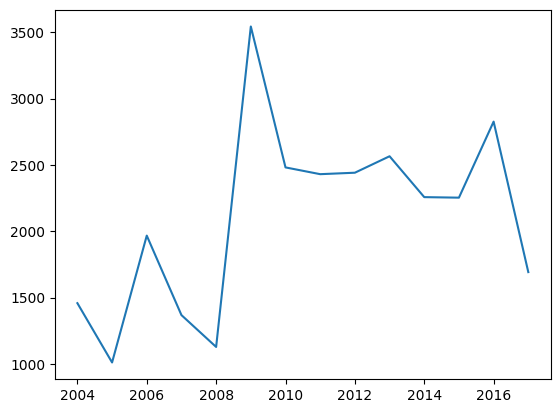

In [67]:
import matplotlib.pyplot as plt
plt.plot(list(range(2004, 2018)),result)
print(result)
print(list(range(2004, 2019)))

In [ ]:
filenames = list(r"E:\\pyth\\parsed_csv\\parsed_csv_cleaned\\" + x + r".csv" for x in list(map(str,list(range(2004,2019)))))

with io.open(r'E:\pyth\map model\final.csv', 'w', encoding="utf-8") as outfile:
    outfile.write("name,year,month,infection,forest cover,population\n")
    for fname in filenames:
        if not fname.endswith("2016.csv"):
            with io.open(fname, encoding="utf-8") as infile:
                for line in infile.readlines()[1:]:
                    outfile.write(line)

In [85]:
finalDf = pd.read_csv(r"E:\pyth\map model\final.csv")
forestDf = pd.read_csv(r"E:\pyth\map model\forest cover.csv")
populationDf = pd.read_csv("E:\pyth\map model\population.csv")
finalDf["forest cover"] = 0
finalDf["population"] = 0

In [ ]:

forestDf['Laikotarpis'] = forestDf['Laikotarpis'].astype(str)
finalDf[finalDf.columns[1]] = finalDf[finalDf.columns[1]].astype(str)

# choose the left key names (use column names rather than numeric positions if possible)
left_keys = [ finalDf.columns[1], finalDf.columns[0] ]   # [Laikotarpis, Administracinė teritorija]
right_keys = ['Laikotarpis', 'Administracinė teritorija']

# pick only needed columns from forestDf
right_subset = forestDf[right_keys + ['Reikšmė']]

# perform left join to keep all rows from finalDf
merged = finalDf.merge(
    right_subset,
    left_on=left_keys,
    right_on=right_keys,
    how='left'
)

# 'Reikšmė' column is now attached; place it into column index 4 if you want:
merged[ finalDf.columns[4] ] = merged['Reikšmė']

# optionally drop the extra columns from the merge
merged = merged.drop(columns=right_keys + ['Reikšmė'])

# if you want to keep the original DataFrame name
finalDf = merged


,name,year,month,infection,forest cover,populationAlytaus apskritis,2004,3,1,population
0,Alytaus m. sav.,2004,3,1,30.4,70053.0,NaN,NaN,NaN,0
1,Druskininkų sav.,2004,3,0,69.2,24665.0,NaN,NaN,NaN,0
2,Alytaus r. sav.,2004,3,0,24.6,31741.0,NaN,NaN,NaN,0
3,Lazdijų r. sav.,2004,3,0,34.8,26221.0,NaN,NaN,NaN,0
4,Varėnos r. sav.,2004,3,0,69.0,30071.0,NaN,NaN,NaN,0


In [76]:
meteoDf = pd.read_csv(r"data\processed_meteo.csv")
meteoDf = meteoDf.drop(meteoDf[meteoDf["year"] == 2025].index)
meteoDf = meteoDf.drop(meteoDf[meteoDf["year"] == 2024].index)


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import distance

# Load data
finalDf = pd.read_csv(r"data\final.csv")
#meteoDf = pd.read_csv(r"data\processed_meteo.csv")
centers = pd.read_csv(r"data\centers.csv")

# Unique stations (rename columns to make it clear: platuma=lat, ilguma=lon)
stations = meteoDf[["platuma", "ilguma", "stoties_kodas"]].drop_duplicates().reset_index(drop=True)

# Loop through centers
for _, center in centers.iterrows():
    mind = np.inf
    minlatlon = None
    name = ""
    # Loop through stations
    for _, station in stations.iterrows():
        # Build (lat, lon) tuples
        
        center_coords = (center["lat"], center["lon"])
        station_coords = (station["platuma"], station["ilguma"])
        
        # Compute distance
        d = distance(center_coords, station_coords).km
        
        # Update if smaller
        if d < mind:
            mind = d
            minlatlon = station_coords
            name = station["stoties_kodas"]
    centers.loc[centers["savivaldybe"] == center["savivaldybe"], "stoties_kodas"] = name

    #print(f"Center {center['savivaldybe']} nearest station {name} at {mind:.2f} km")
centers.to_csv(r"data\municipalities_meteo_stations.csv", index=None)

Center Pakruojo r. sav. nearest station siauliu-ams at 36.06 km
Center Kazlų Rūdos sav. nearest station kauno-ams at 26.32 km
Center Jonavos r. sav. nearest station ukmerges-ams at 33.67 km
Center Vilniaus m. sav. nearest station vilniaus-ams at 12.98 km
Center Šiaulių r. sav. nearest station siauliu-ams at 14.26 km
Center Vilkaviškio r. sav. nearest station kybartu-ams at 12.77 km
Center Kauno m. sav. nearest station kauno-ams at 6.42 km
Center Jurbarko r. sav. nearest station raseiniu-ams at 28.50 km
Center Anykščių r. sav. nearest station utenos-ams at 32.81 km
Center Marijampolės sav. nearest station lazdiju-ams at 35.15 km
Center Šalčininkų r. sav. nearest station vilniaus-ams at 36.11 km
Center Pagėgių sav. nearest station silutes-ams at 40.82 km
Center Utenos r. sav. nearest station utenos-ams at 6.52 km
Center Šiaulių m. sav. nearest station siauliu-ams at 4.12 km
Center Kėdainių r. sav. nearest station dotnuvos-ams at 7.93 km
Center Prienų r. sav. nearest station kauno-ams at 

In [79]:
finalDf["oro_temp,juntamoji_temp,debesuotumas,slegis_juros_lyg,santyk_oro_dregme,kritutliu_kiekis".split(",")] = np.nan
municipality_map = pd.read_csv(r"data\municipalities_meteo_stations.csv")
l = []

for idx, row in finalDf.iterrows():
    station = municipality_map.loc[municipality_map["savivaldybe"] == row["name"], "stoties_kodas"]
    
    # to find unmapped municipalities

    if not len(station):
        if row["name"] not in l:
            l.append(row["name"])
            print("EROOR NX" + row["name"])
    else:
        pass
    
    #print(meteoDf["stoties_kodas"] == str(station))
    station = station.squeeze()
    meteo_row = meteoDf.loc[(meteoDf["year"] == row["year"]) & (meteoDf["month"] == row["month"]) & (meteoDf["stoties_kodas"] == str(station)), :]
    if not len(meteo_row):
        continue
    
    colNames = "oro_temp,juntamoji_temp,debesuotumas,slegis_juros_lyg,santyk_oro_dregme,kritutliu_kiekis".split(",")
    for colName in colNames:
        finalDf.at[idx, colName] = meteo_row[colName].squeeze()
finalDf

,name,year,month,infection,forest cover,population,area,oro_temp,juntamoji_temp,debesuotumas,slegis_juros_lyg,santyk_oro_dregme,kritutliu_kiekis
0,Alytaus apskritis,2004,3,1,49.0,182751.0,5418.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alytaus m. sav.,2004,3,1,30.4,70053.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Druskininkų sav.,2004,3,0,69.2,24665.0,453.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Alytaus r. sav.,2004,3,0,24.6,31741.0,1403.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Lazdijų r. sav.,2004,3,0,34.8,26221.0,1306.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,Visagino sav.,2018,12,0,57.5,19890.0,58.0,-2.022177,-5.000941,94.550000,1016.457796,93.163978,48.0
10090,Utenos apskritis,2018,12,4,34.7,132968.0,7191.0,-1.304167,-3.675806,94.419890,1016.233199,91.587366,49.9
10091,Vilniaus r. sav.,2018,12,4,41.7,92776.0,2129.0,-1.458737,-4.703629,94.094692,1016.493683,94.401882,73.6
10092,Vilniaus m. sav.,2018,12,33,34.6,540623.0,400.0,-1.458737,-4.703629,94.094692,1016.493683,94.401882,73.6


In [82]:
newDf = finalDf.dropna(thresh=8)
newDf
finalDf.to_csv(r"data\attempt.csv")